<a href="https://colab.research.google.com/github/aafreen2212/DL/blob/master/DL_HW_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib
import os
import pandas as pd

In [2]:
indian_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02504013")    #indian elephant

indian_soup = BeautifulSoup(indian_page.content, 'html.parser')   

african_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02504458")    #african elephant synset

african_soup = BeautifulSoup(african_page.content, 'html.parser')


tusker_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n01871265")   #tuskers synset
#print(t_page.content)

tusker_soup = BeautifulSoup(tusker_page.content, 'html.parser')


In [4]:

indian_str_soup=str(indian_soup)#convert soup to string so it can be split
type(indian_str_soup)
indian_split_urls=indian_str_soup.split('\r\n')     #split so each url is a different possition on a list
print(len(indian_split_urls))

african_str_soup=str(african_soup)
type(african_str_soup)
african_split_urls=african_str_soup.split('\r\n')     #split so each url is a different possition on a list
print(len(african_split_urls))


tusker_str_soup=str(tusker_soup)
type(tusker_str_soup)
tusker_split_urls=tusker_str_soup.split('\r\n')     #split so each url is a different possition on a list
print(len(tusker_split_urls))

1650
2278
1065


In [5]:
#Create directories
!mkdir /content/train #create the Train folder
!mkdir /content/train/Indian_Elephant    #create the ie folder
!mkdir /content/train/African_Alephant    #create the ae folder
!mkdir /content/train/Tuskers    #create the t folder

!mkdir /content/validation
!mkdir /content/validation/Indian_Elephant #create the ie folder
!mkdir /content/validation/African_Alephant #create the ae folder
!mkdir /content/validation/Tuskers #create the t folder

!mkdir /content/test/ 
!mkdir /content/test/test #list the files inside test

In [7]:
img_rows, img_cols = 32, 32     #number of rows and columns to convert the images to
input_shape = (img_rows, img_cols, 3)   #format to store the images (rows, columns,channels) called channels last

def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image


In [11]:
n_of_training_images=150    #the number of training images to use

for progress in range(n_of_training_images):    #store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not indian_split_urls[progress] == None:
      try:
        I = url_to_image(indian_split_urls[progress])
        if (len(I.shape))==3:    #check if the image has width, length and channels
          save_path = '/content/train/Indian_Elephant/img'+str(progress)+'.jpg'      #create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None


#do the same for african elephants:
for progress in range(n_of_training_images):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not african_split_urls[progress] == None:
      try:
        I = url_to_image(african_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/train/African_Alephant/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None


0
20
40
60
80
100
120
140
0
20
40
60
80
100
120
140


In [12]:
#do the same for t:
for progress in range(n_of_training_images):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not tusker_split_urls[progress] == None:
      try:
        I = url_to_image(tusker_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/train/Tuskers/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

0
20
40
60
80
100
120
140


Validation Set

In [13]:
for progress in range(50):      #store all the images on a directory
    if(progress%10==0):
        print(progress)
    if not indian_split_urls[n_of_training_images+progress] == None:
      try:
        I = url_to_image(indian_split_urls[n_of_training_images+progress])      #get images that are different from the ones used for training
        if (len(I.shape))==3:       #check if the image has width, length and channels
          save_path = '/content/validation/Indian_Elephant/img'+str(progress)+'.jpg'      #create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(50):    #store all the images on a directory
    # Print out progress whenever progress is a multiple of 10 so we can follow the
    # (relatively slow) progress
    if(progress%10==0):
        print(progress)
    if not african_split_urls[n_of_training_images+progress] == None:
      try:
        I = url_to_image(african_split_urls[n_of_training_images+progress])   #get images that are different from the ones used for training
        if (len(I.shape))==3:     #check if the image has width, length and channels
          save_path = '/content/validation/African_Alephant/img'+str(progress)+'.jpg'   #create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(50):    #store all the images on a directory
    # Print out progress whenever progress is a multiple of 10 so we can follow the
    # (relatively slow) progress
    if(progress%10==0):
        print(progress)
    if not tusker_split_urls[progress] == None:
      try:
        I = url_to_image(tusker_split_urls[n_of_training_images+progress])   #get images that are different from the ones used for training
        if (len(I.shape))==3:       #check if the image has width, length and channels
          save_path = '/content/validation/Tuskers/img'+str(progress)+'.jpg'    #create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

0
10
20
30
40
0
10
20
30
40
0
10
20
30
40


In [14]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

In [15]:
resnet_50_model = ResNet50(weights='imagenet')


102973440/102967424 [==============================] - 1s 0us/step


In [30]:

model = Sequential()
model.add(ResNet50(include_top = False, pooling = 'avg', weights = "imagenet"))
model.add(Dense(3, activation = 'softmax'))
model.layers[0].trainable = False

In [31]:
model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:

image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
        '/content/train',
        target_size=(image_size, image_size),
        batch_size=100,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '/content/validation',
        target_size=(image_size, image_size),
        batch_size=100,
        class_mode='categorical')

Found 280 images belonging to 3 classes.
Found 104 images belonging to 3 classes.


In [20]:
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
checkpointer = ModelCheckpoint(filepath = 'best.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [22]:
history = model.fit_generator(train_generator, epochs = 10, validation_data=validation_generator, callbacks=[checkpointer, early_stopper])


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
3/3 [==============================] - 46s 15s/step - loss: 1.4716 - accuracy: 0.3214 - val_loss: 1.4896 - val_accuracy: 0.3846
Epoch 2/10
3/3 [==============================] - 45s 15s/step - loss: 1.3091 - accuracy: 0.4071 - val_loss: 1.1705 - val_accuracy: 0.4327
Epoch 3/10
3/3 [==============================] - 41s 14s/step - loss: 1.0617 - accuracy: 0.4714 - val_loss: 1.1011 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 41s 14s/step - loss: 1.0062 - accuracy: 0.4786 - val_loss: 0.9880 - val_accuracy: 0.4808
Epoch 5/10
3/3 [==============================] - 44s 15s/step - loss: 0.8463 - accuracy: 0.6143 - val_loss: 0.9991 - val_accuracy: 0.5481
Epoch 6/10
3/3 [==============================] - 41s 14s/step - loss: 0.8126 - accuracy: 0.6107 - val_loss: 0.9550 - val_accuracy: 0.5577
Epoch 7/10
3/3 [==============================] - 41s 14s/step - loss: 0.7255 - accuracy: 

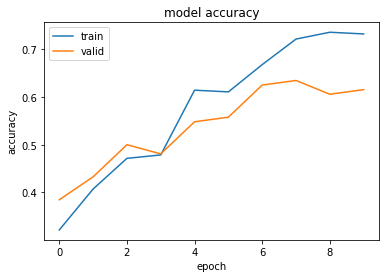

In [23]:
import matplotlib.pyplot as plt  

plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

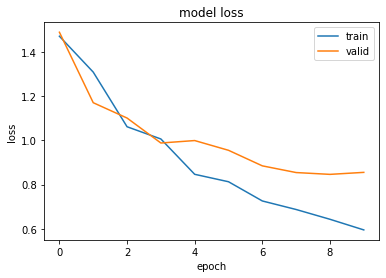

In [24]:

plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 6147      
Total params: 23,593,859
Trainable params: 6,147
Non-trainable params: 23,587,712
_________________________________________________________________
